# Tutorial 06-A Dimensions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### 1. Read in all data and compile a summary data frame

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
print(data.head())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]


this is the main file that is loaded into a variable and view the head to check data is loaded correctly

In [3]:
exit_rate = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)
page_revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
page_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
page_speed = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
page_viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)

loading the extra files to variables as preparation to move them all to a single sata frame then viewing the head of each file to see the data and to make sure that they have loaded properly

In [4]:
print(exit_rate.head(),"\n"
      , page_revenue.head(),"\n"
      , page_size.head(),"\n"
      , page_speed.head(),"\n"
      , page_viewing_time.head(),"\n")

    Exit rate (%)
Id               
1       24.759071
2       18.458663
3       47.518158
4       32.354706
5       45.828504 
     Page Revenue (£)
Id                  
1        1972.142118
2         101.836934
3         196.146652
4         102.653630
5           3.060067 
     Page Size (Kb)
Id                
1       106.153936
2        79.352399
3        48.208457
4       105.709602
5        43.593542 
     Page Download Speed (s)
Id                         
1                  7.601041
2                  7.079163
3                  4.714836
4                 13.995231
5                  5.622858 
     Avg. Viewing Time (s)
Id                       
1              175.438381
2               75.474441
3               10.027850
4              117.802372
5               12.522355 



In [5]:
summary_data = pd.DataFrame(index=data.columns)

creation of a data frame using the varaible data index as the new dataframe index 

In [6]:
summary_data['Exit'] = exit_rate.values
summary_data['Revenue'] = page_revenue.values
summary_data['Size'] = page_size.values
summary_data['Download'] = page_speed.values
summary_data['Viewing'] = page_viewing_time.values

this adds the extra data to the exisitng data frame in columns that are names Exit, Revenue, Size, Download and Viewing 

In [7]:
summary_data['Hits'] = data.sum().values

by summing the values of the original data and adding it to a new column we have a more useful data and the total hits to each page that is tracked

In [8]:
print(summary_data.head())

          Exit      Revenue        Size   Download     Viewing    Hits
001  24.759071  1972.142118  106.153936   7.601041  175.438381  379682
002  18.458663   101.836934   79.352399   7.079163   75.474441   17401
003  47.518158   196.146652   48.208457   4.714836   10.027850   27249
004  32.354706   102.653630  105.709602  13.995231  117.802372   11668
005  45.828504     3.060067   43.593542   5.622858   12.522355     533


by displaying the head of the new dataframe we can see that all data is correctly loaded and ready to be visulised 

### 2. Initial visualisation showing bar chart subplots for all 6 metrics

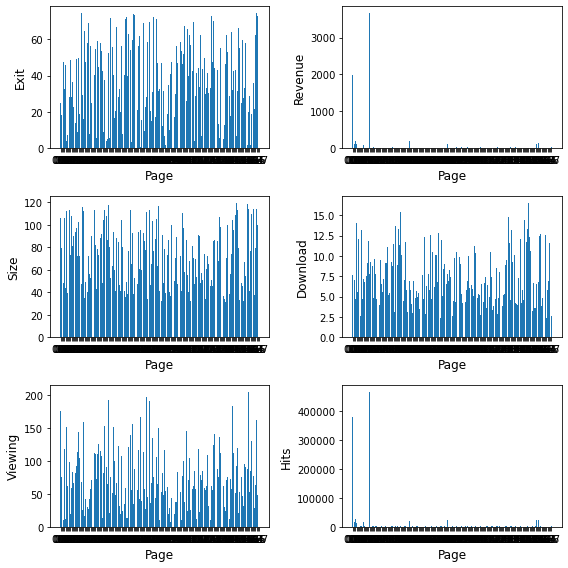

In [9]:
plt.figure(figsize=(8, 8))
counter = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
    sub = plt.subplot(3, 2, counter)
    sub.bar(x_pos, summary_data[attribute], align='center')
    sub.set_xticks([])
    sub.set_xticks(x_pos)
    sub.set_xticklabels(summary_data.index)
    sub.set_xlabel('Page', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.tight_layout()
plt.show()

this shows all six attribtes of the dataframe in a single plot, but there is too much information to get solid correlations for each attribute, however more information could be extracted with further exploration into this data

### 3.  Visualisation showing radar subplots for high volume pages

In [10]:
def radarPlot(normalised_data, selected, subplot_x, subplot_y):
    n_attributes = len(normalised_data.columns)
    angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
    plt.figure(figsize=(8, 8))
    counter = 1
    for name in selected:
        values = normalised_data.loc[[name]].values.flatten().tolist()
        values += values[:1]
        sub = plt.subplot(subplot_x, subplot_y, counter, polar=True)
        sub.plot(angles, values)
        sub.fill(angles, values, alpha=0.1)
        sub.set_ylim(ymax=1.05)
        sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        sub.set_xticks(angles[0:-1])
        sub.set_xticklabels(normalised_data.columns, fontsize=8)
        sub.set_title('Page ' + name, fontsize=12, loc='left')
        counter += 1
    plt.tight_layout()
    plt.show()

function to draw radar plots 

Inputs:

nomalised data - data frame that has been normalised

selected - list of strings that indicated the selected values

subplot_x - int that indicates the x number of plots to display

subplot_y - int that indicates the y number of plots to display

Outputs:

$x$ by $y$ radar subplots

In [11]:
summary_data_arranged = pd.DataFrame(index=data.columns)
summary_data_arranged['Size'] = page_size.values
summary_data_arranged['Hits'] = data.sum().values
summary_data_arranged['Revenue'] = page_revenue.values
summary_data_arranged['Viewing'] = page_viewing_time.values
summary_data_arranged['Download'] = page_speed.values
summary_data_arranged['Exit'] = exit_rate.values
print(summary_data_arranged.head())

           Size    Hits      Revenue     Viewing   Download       Exit
001  106.153936  379682  1972.142118  175.438381   7.601041  24.759071
002   79.352399   17401   101.836934   75.474441   7.079163  18.458663
003   48.208457   27249   196.146652   10.027850   4.714836  47.518158
004  105.709602   11668   102.653630  117.802372  13.995231  32.354706
005   43.593542     533     3.060067   12.522355   5.622858  45.828504


to swap the order around in the radar plot the data frame is rearranged as the radar plot will display the data in the order that the dataframe is arranged 

In [12]:
normalised_data = summary_data_arranged / summary_data_arranged.max()
print(normalised_data.head())

         Size      Hits   Revenue   Viewing  Download      Exit
001  0.885814  0.812809  0.537839  0.856381  0.459396  0.332090
002  0.662165  0.037251  0.027773  0.368419  0.427855  0.247583
003  0.402281  0.058334  0.053493  0.048950  0.284958  0.637354
004  0.882106  0.024978  0.027996  0.575038  0.845852  0.433969
005  0.363771  0.001141  0.000835  0.061126  0.339838  0.614691


this normalises the data frame to values between 0 and 1 ready for the radar subplots 

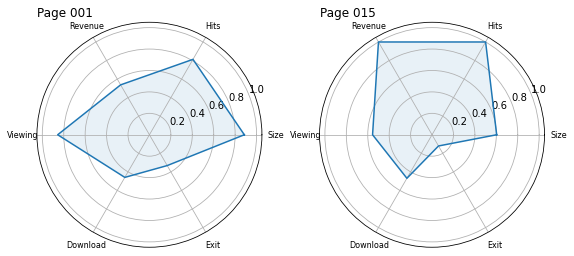

In [13]:
selected = ['001', '015'] # high volume pages that were identifed in previous labs

radarPlot(normalised_data, selected, 2, 2) # call to function to display radar subplots

By putting Revenue and hits at the top of the radar we can easily identify that these are important metrics to be assessing. Viewing and size can be seen as netural indicators as the company has specified that viewing time is neutral for one and the size of the page can be wildly different for different pages.

At the bottom of the radar are metrics that can negative attributes where smaller footprints are better. Here we have download speed and exit rate as we should aim for faster download speeds to help customers get the information that they want faster and a low exit rate as this indicates a high engangement rate

### 4. Visualisation showing radar subplots for medium volume pages

In [14]:
selected =['002','003','004','010','048','080','155','156'] # medium volume pages identified in previous labs

In [15]:
normalised_data = summary_data / summary_data.loc[selected].max()

this normalised data uses the $.doc$ function that uses the list as a selection to better visulise the data for medium volume pages

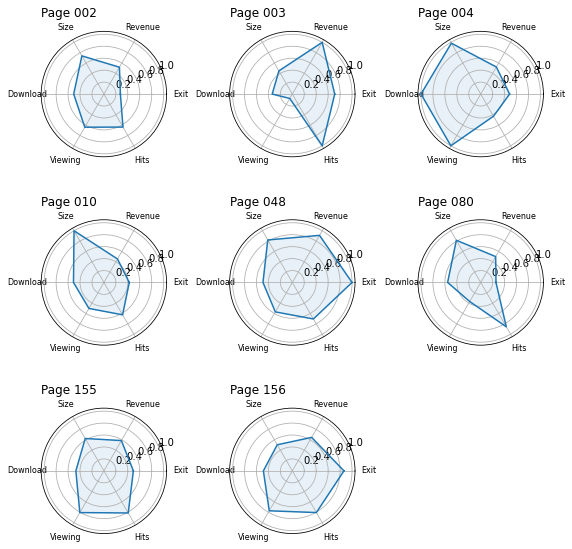

In [16]:
radarPlot(normalised_data, selected, 3, 3) # call to function to display radar subplots

Page 003 has the highest his and revenue which would make this the most valuble medium volume page, page 048 has a high revenue rate but also has a very high exit rate which would require some more investigation 

### 5. Create a correlogram / pair-plot of all 6 metrics

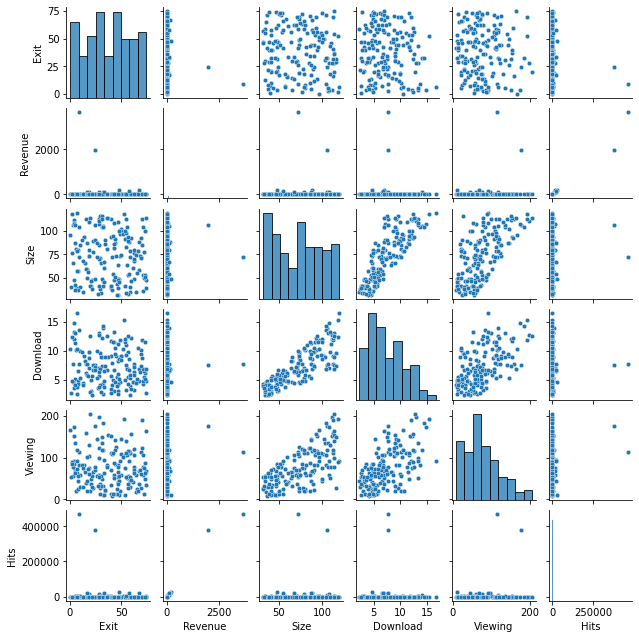

In [17]:
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

Download time and size have obvious strong correlations as viewing time and size, there are also weaker correlations between download time and viewing time from these plots

### 6. Create a heatmap of correlations between the 6 metrics

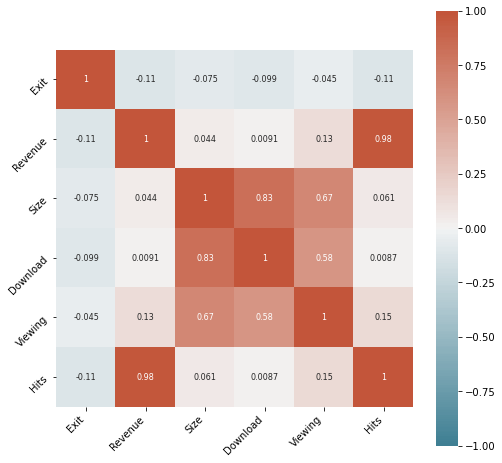

In [18]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Hit and revenue have a very strong correlations that was not identified in the pair-plot. download and size are strongly corrrelated also size and viewing time has some correlation 

### 7.  Generate a bubble plot of hits against revenue with viewing time determining the bubble sizes

In [19]:
print(summary_data.head())

          Exit      Revenue        Size   Download     Viewing    Hits
001  24.759071  1972.142118  106.153936   7.601041  175.438381  379682
002  18.458663   101.836934   79.352399   7.079163   75.474441   17401
003  47.518158   196.146652   48.208457   4.714836   10.027850   27249
004  32.354706   102.653630  105.709602  13.995231  117.802372   11668
005  45.828504     3.060067   43.593542   5.622858   12.522355     533


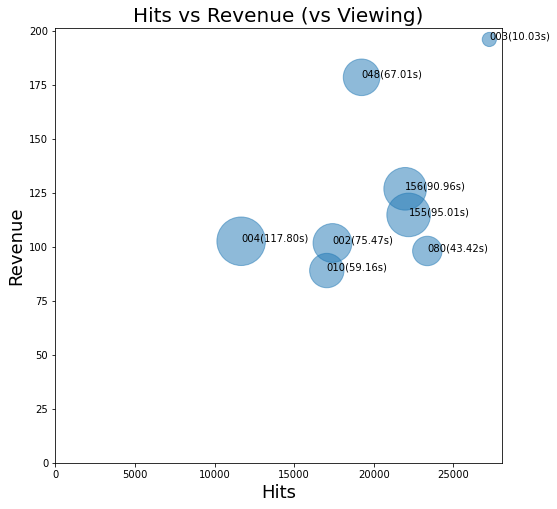

In [20]:
selected =['002','003','004','010','048','080','155','156']
summary_data = summary_data.loc[selected]

summary_data['BubbleSize'] = summary_data['Viewing'] * 20

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Hits'], 
            summary_data['Revenue'], 
            s=summary_data['BubbleSize'], alpha=0.5)
plt.xticks([0, 5000, 10000, 15000, 20000, 25000])
plt.yticks([0,25,50,75,100,125,150,175,200])
plt.title('Hits vs Revenue (vs Viewing)', fontsize=20)
plt.xlabel('Hits', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
for i, name in enumerate(summary_data.index):
    plt.annotate(name + "(" + str(format(summary_data["Viewing"][i], '.2f')) + "s)", 
                 (summary_data['Hits'][i], 
                  summary_data['Revenue'][i]))
plt.show()

Page 003 has the highest hit and revenue but stands out as it has the shortest viewing time which is not what would be expected from a webpage 